## Project 1: FinTech Stock Portfolio vs. Crypto Portfolio - Comparative Analysis ##

In this notebook, we've created a comparative analysis across portfolios using quantitative metrics. The underlying data from this notebook is then converted to visualizations in the dashboard notebook.

In [32]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import san

%matplotlib inline

from datetime import datetime,date

In [33]:
load_dotenv()

True

In [34]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
 
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

# Financial Stock Portfolio #

In [45]:
# Financial portfolio index: VISA, SQUARE, PAYPAL, MASTERCARD, AMEX

# Format current date as ISO format
today = pd.Timestamp("2016-10-08", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()


# Set the tickers for Financial and Technology portfolio indexes
fin_tickers = ["V", "SQ", "PYPL", "MA"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Fintech stocks
# (use a limit=1000 parameter to call the most recent 1000 days of data)
financial_investments = alpaca.get_barset(
    fin_tickers,
    timeframe,
    start = today,
    end = end,
    limit=1000
).df

financial_investments.head()

MA                                    PYPL  \
                             open    high     low   close   volume   open   
time                                                                        
2017-10-19 00:00:00-04:00  145.39  146.12  144.66  145.00  2330231  67.30   
2017-10-20 00:00:00-04:00  145.63  145.73  144.57  145.38  2761126  71.33   
2017-10-23 00:00:00-04:00  146.00  146.50  145.30  145.58  1644458  71.05   
2017-10-24 00:00:00-04:00  146.19  146.49  145.35  145.77  2194276  69.72   
2017-10-25 00:00:00-04:00  146.50  146.98  145.21  146.26  2251755  69.98   

                                                              SQ           \
                             high    low  close    volume   open     high   
time                                                                        
2017-10-19 00:00:00-04:00  67.450  66.16  67.27  10191782  32.09  32.2600   
2017-10-20 00:00:00-04:00  71.730  69.69  70.99  29821542  32.63  32.7500   
2017-10-23 00:00:00-04:00  71.330  69.55  69.84  10447036  32.74  32.9757   
2017-10-24 00:00:00-04:00  70.565  69.67  70.20  10228593  32.80  32.8425   
2017-10-25 00:00:00-04:00  71.420  69.85  71.03   9944016  32.99  32.9900   

                                                          V                   \
                              low    close   volume    open    high      low   
time                                                                           
2017-10-19 00:00:00-04:00  31.441  32.1103  5821528  107.27  107.78  106.900   
2017-10-20 00:00:00-04:00  32.200  32.4950  5172093  107.70  107.70  106.970   
2017-10-23 00:00:00-04:00  32.460  32.5200  3878336  108.05  108.23  107.095   
2017-10-24 00:00:00-04:00  32.500  32.7100  3147485  107.56  108.64  107.180   
2017-10-25 00:00:00-04:00  32.200  32.9000  4949101  109.50  110.61  108.000   

                                             
                            close    volume  
time                                         
2017-10-19 00:00:00-04:00  107.05   5296487  
2017-10-20 00:00:00-04:00  107.60   4612356  
2017-10-23 00:00:00-04:00  107.56   5162010  
2017-10-24 00:00:00-04:00  108.40   8418473  
2017-10-25 00:00:00-04:00  109.49  10557543

In [46]:
# Drop columns and keep close
financial_close = financial_investments.drop(financial_investments.columns[[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19]], axis=1)
financial_close = financial_close.dropna()
financial_close.head()

,MA,PYPL,SQ,V
,close,close,close,close
time,,,,
2017-10-19 00:00:00-04:00,145.00,67.27,32.1103,107.05
2017-10-20 00:00:00-04:00,145.38,70.99,32.4950,107.60
2017-10-23 00:00:00-04:00,145.58,69.84,32.5200,107.56
2017-10-24 00:00:00-04:00,145.77,70.20,32.7100,108.40
2017-10-25 00:00:00-04:00,146.26,71.03,32.9000,109.49


In [47]:
# Calculate daily returns for each stock column
financial_close = financial_close.pct_change()

# Drop NAs
financial_close = financial_close.dropna().copy()

# Display sample data
financial_close.head()

,MA,PYPL,SQ,V
,close,close,close,close
time,,,,
2017-10-20 00:00:00-04:00,0.002621,0.055300,0.011981,0.005138
2017-10-23 00:00:00-04:00,0.001376,-0.016199,0.000769,-0.000372
2017-10-24 00:00:00-04:00,0.001305,0.005155,0.005843,0.007810
2017-10-25 00:00:00-04:00,0.003361,0.011823,0.005809,0.010055
2017-10-26 00:00:00-04:00,0.002325,0.004224,0.036778,0.003014


In [48]:
# Calculate the weighted returns for the stock portfolio with equal weights

# Set weights
financial_weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
financial_close = financial_close.dot(financial_weights)

# Display sample data
financial_close.head()

time
2017-10-20 00:00:00-04:00    0.018760
2017-10-23 00:00:00-04:00   -0.003607
2017-10-24 00:00:00-04:00    0.005028
2017-10-25 00:00:00-04:00    0.007762
2017-10-26 00:00:00-04:00    0.011585
dtype: float64

# Tech Stock Portfolio #

In [49]:
# Technology portfolio index: FACEBOOK, AMAZON, APPLE, NETFLIX, GOOGLE

# Format current date as ISO format
today = pd.Timestamp("2016-10-08", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()

# Set the tickers for Financial and Technology portfolio indexes
faang_tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOGL"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Fintech stocks
# (use a limit=1000 parameter to call the most recent 1000 days of data)
faang_investments = alpaca.get_barset(
    faang_tickers,
    timeframe,
    start = today,
    end = end,
    limit=1000
).df

faang_investments.head()

AAPL                                      AMZN  \
                             open    high     low   close    volume    open   
time                                                                          
2017-10-19 00:00:00-04:00  156.75  157.08  155.02  155.98  32669974  990.33   
2017-10-20 00:00:00-04:00  156.61  157.75  155.96  156.25  18427186  993.53   
2017-10-23 00:00:00-04:00  156.89  157.69  155.50  156.20  16418890  986.73   
2017-10-24 00:00:00-04:00  156.29  157.42  156.20  157.09  14016780  969.00   
2017-10-25 00:00:00-04:00  156.91  157.55  155.27  156.41  16016689  978.00   

                                                             ...    GOOGL  \
                              high     low   close   volume  ...     open   
time                                                         ...            
2017-10-19 00:00:00-04:00  991.050  980.24  986.60  1963364  ...  1004.75   
2017-10-20 00:00:00-04:00  994.620  982.00  982.91  1406057  ...  1007.05   
2017-10-23 00:00:00-04:00  986.775  962.50  966.34  2341953  ...  1005.18   
2017-10-24 00:00:00-04:00  979.850  965.00  976.00  1744834  ...   986.50   
2017-10-25 00:00:00-04:00  984.440  966.24  972.91  2001000  ...   986.21   

                                                                  NFLX  \
                              high       low    close   volume    open   
time                                                                     
2017-10-19 00:00:00-04:00  1007.32   997.300  1001.83  1057459  193.01   
2017-10-20 00:00:00-04:00  1008.65  1002.270  1005.09   881271  195.85   
2017-10-23 00:00:00-04:00  1005.71   983.100   985.54   964752  194.17   
2017-10-24 00:00:00-04:00   989.26   977.080   988.50   752762  192.75   
2017-10-25 00:00:00-04:00   994.43   977.722   991.47   875898  195.42   

                                                                 
                               high       low    close   volume  
time                                                             
2017-10-19 00:00:00-04:00  195.2500  191.1600  195.100  5549365  
2017-10-20 00:00:00-04:00  196.3800  193.7700  194.056  4539365  
2017-10-23 00:00:00-04:00  194.8999  191.0346  192.470  5408928  
2017-10-24 00:00:00-04:00  196.7350  191.4000  196.050  5796323  
2017-10-25 00:00:00-04:00  197.0550  193.0100  193.770  4120234  

[5 rows x 25 columns]

In [50]:
# Drop columns and keep close
faang_close = faang_investments.drop(faang_investments.columns[[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 24]], axis=1)
faang_close = faang_close.dropna()
faang_close.head()

,AAPL,AMZN,FB,GOOGL,NFLX
,close,close,close,close,close
time,,,,,
2017-10-19 00:00:00-04:00,155.98,986.60,174.56,1001.83,195.100
2017-10-20 00:00:00-04:00,156.25,982.91,174.97,1005.09,194.056
2017-10-23 00:00:00-04:00,156.20,966.34,171.28,985.54,192.470
2017-10-24 00:00:00-04:00,157.09,976.00,171.80,988.50,196.050
2017-10-25 00:00:00-04:00,156.41,972.91,170.60,991.47,193.770


In [51]:
# Calculate daily returns for each stock column
faang_close = faang_close.pct_change()

# Drop NAs
faang_close = faang_close.dropna().copy()

# Display sample data
faang_close.head()

,AAPL,AMZN,FB,GOOGL,NFLX
,close,close,close,close,close
time,,,,,
2017-10-20 00:00:00-04:00,0.001731,-0.003740,0.002349,0.003254,-0.005351
2017-10-23 00:00:00-04:00,-0.000320,-0.016858,-0.021089,-0.019451,-0.008173
2017-10-24 00:00:00-04:00,0.005698,0.009996,0.003036,0.003003,0.018600
2017-10-25 00:00:00-04:00,-0.004329,-0.003166,-0.006985,0.003005,-0.011630
2017-10-26 00:00:00-04:00,0.006457,-0.000380,0.000000,-0.000050,0.007431


In [52]:
# Calculate the weighted returns for the stock portfolio with equal weights

# Set weights
faang_weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
faang_close = faang_close.dot(faang_weights)

# Display sample data
faang_close.head()

time
2017-10-20 00:00:00-04:00   -0.000351
2017-10-23 00:00:00-04:00   -0.013178
2017-10-24 00:00:00-04:00    0.008067
2017-10-25 00:00:00-04:00   -0.004621
2017-10-26 00:00:00-04:00    0.002692
dtype: float64

# Combine FinTech Stock Data

In [53]:
# Join the financial stock portfolio returns to the technology stock portfolio returns
fintech_portfolios = pd.concat([financial_close, faang_close], axis="columns", join="inner")
fintech_portfolios = fintech_portfolios.dropna().copy()
fintech_portfolios.columns = ['fin_stocks', 'faang_stocks']
fintech_portfolios.head()

,fin_stocks,faang_stocks
time,,
2017-10-20 00:00:00-04:00,0.018760,-0.000351
2017-10-23 00:00:00-04:00,-0.003607,-0.013178
2017-10-24 00:00:00-04:00,0.005028,0.008067
2017-10-25 00:00:00-04:00,0.007762,-0.004621
2017-10-26 00:00:00-04:00,0.011585,0.002692


# Crypto Portfolio #

In [54]:
# Fetch Crypto Data and Date Ranges

btc = san.get(
    "prices/bitcoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

eth = san.get(
    "prices/ethereum",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ltc = san.get(
    "prices/litecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ada = san.get(
    "prices/cardano",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

doge = san.get(
    "prices/dogecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

In [104]:
# Combine all crypto data into a single DataFrame

crypto_df = pd.concat([btc, eth, ltc, ada, doge], axis=1, join="inner")
crypto_close = crypto_df.drop(crypto_df.columns[[0,1,3,4,5,7,8,9,11,12,13,15]], axis=1)
# crypto_close.columns=['BTC', 'ETH', 'LTC', 'ADA', 'DOGE']
crypto_close.head()

,priceUsd,priceUsd,priceUsd,priceUsd,priceUsd
datetime,,,,,
2017-10-01 00:00:00+00:00,4403.74,302.337,54.5433,0.024969,0.001084
2017-10-02 00:00:00+00:00,4409.32,297.475,53.3760,0.025932,0.001085
2017-10-03 00:00:00+00:00,4317.48,292.463,52.3496,0.020816,0.001108
2017-10-04 00:00:00+00:00,4229.36,292.658,51.3995,0.021931,0.001024
2017-10-05 00:00:00+00:00,4328.41,295.863,51.6695,0.021489,0.001001


In [105]:
# Calculate daily returns for each crypto column
crypto_daily_returns = crypto_df.pct_change()

# Drop NAs
crypto_daily_returns = crypto_daily_returns.drop(crypto_df.columns[[0,1,3,4,5,7,8,9,11,12,13,15]], axis=1)

# Rename Column Headers
crypto_daily_returns.columns=['BTC', 'ETH', 'LTC', 'ADA', 'DOGE']

# Display sample data
crypto_daily_returns.head()

,BTC,ETH,LTC,ADA,DOGE
datetime,,,,,
2017-10-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2017-10-02 00:00:00+00:00,0.001267,-0.016081,-0.021401,0.038539,0.001606
2017-10-03 00:00:00+00:00,-0.020829,-0.016848,-0.019230,-0.197287,0.021219
2017-10-04 00:00:00+00:00,-0.020410,0.000667,-0.018149,0.053599,-0.075795
2017-10-05 00:00:00+00:00,0.023420,0.010951,0.005253,-0.020190,-0.022501


In [114]:
# Calculate the weighted returns for the crypto portfolio with equal weights

# Set weights
crypto_weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
crypto_close = crypto_daily_returns.dot(crypto_weights).dropna()

# Display sample data
crypto_close.head()

datetime
2017-10-02 00:00:00+00:00    0.000786
2017-10-03 00:00:00+00:00   -0.046595
2017-10-04 00:00:00+00:00   -0.012018
2017-10-05 00:00:00+00:00   -0.000614
2017-10-06 00:00:00+00:00   -0.004222
Freq: D, dtype: float64

# Combined Portfolio Data #

In [142]:
# Append the crypto portfolio returns dataframe to the fintech portfolio returns data frame


all_portfolios = pd.DataFrame([fintech_portfolios, crypto_close], columns=['time'])
all_portfolios

# all_portfolios = fintech_portfolios["crypto"] = crypto_close
# all_portfolios

# fintech_portfolios["crypto"] = crypto_close
# fintech_portfolios

C:\Users\charl\anaconda3\lib\site-packages\pandas\core\internals\construction.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,time
0,fin_stocks faang_s...
1,"[0.0007858226709704484, -0.046594932474664175,..."


# Quantitative Analysis #

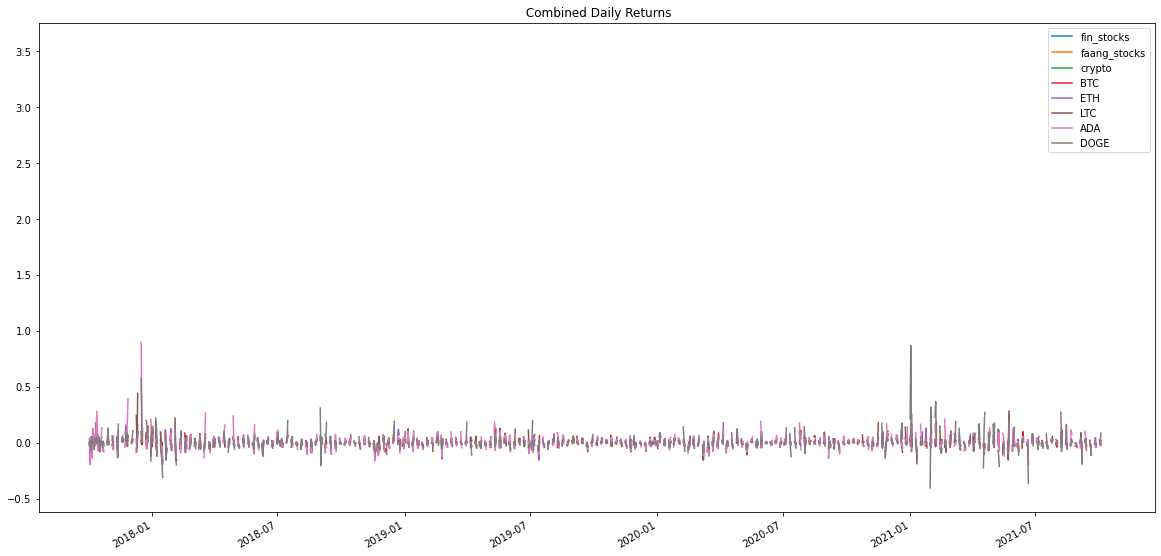

In [128]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20, 10), title=" Combined Daily Returns");

<AxesSubplot:title={'center':'Cumulative Returns'}>

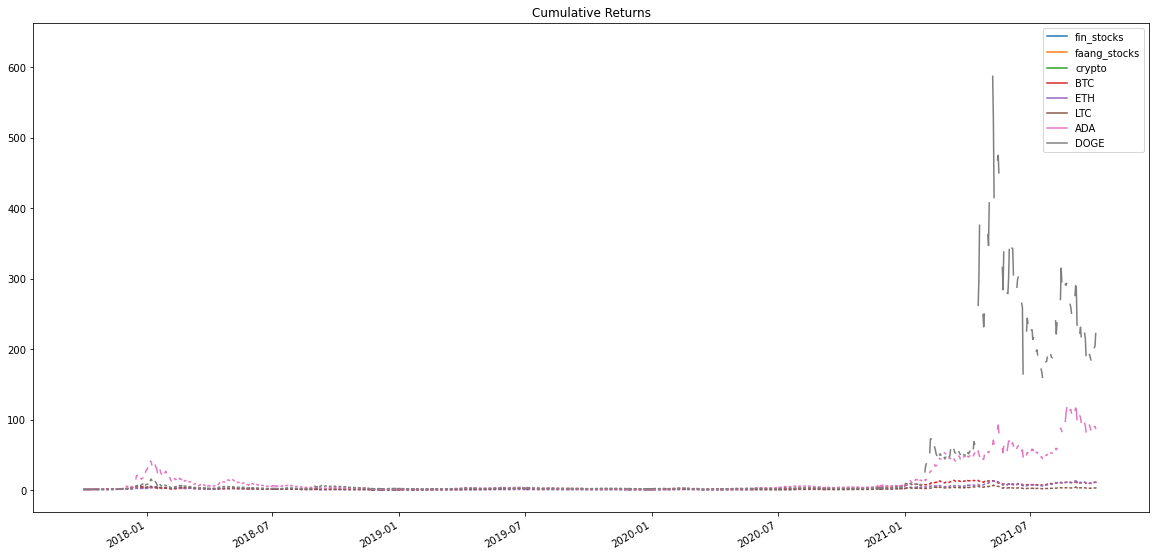

In [126]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

# Risk Analysis #

<AxesSubplot:title={'center':'Portfolio Risk'}>

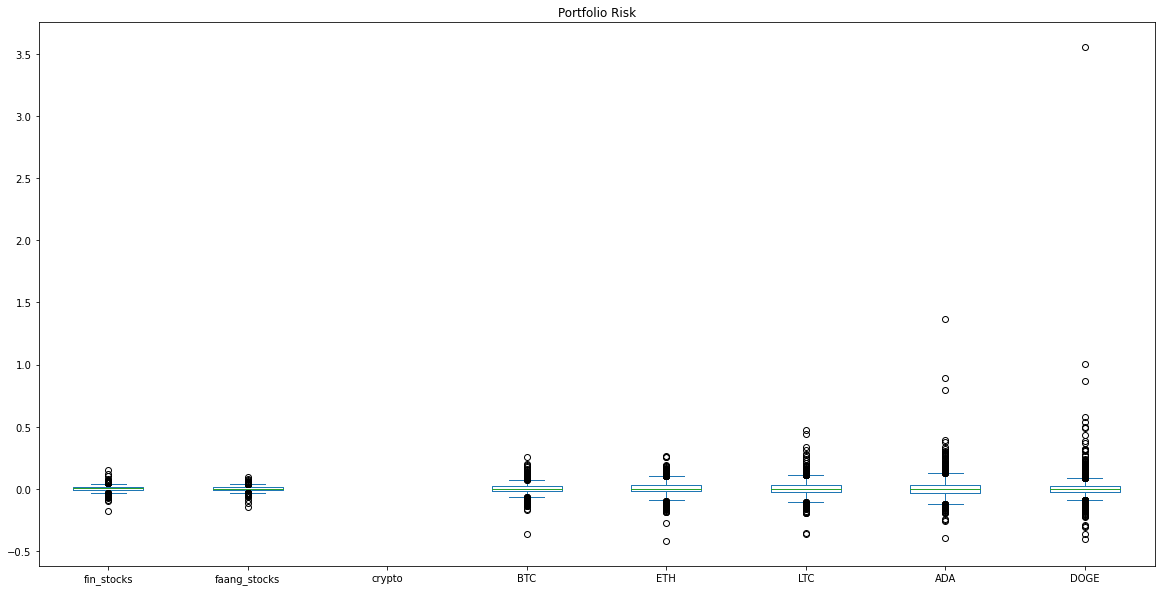

In [127]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [ ]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

In [ ]:
# Calculate the daily standard deviation of the FinTech Stock Portfolio
sp500_risk = all_portfolios["S&P 500"].std()

# Calculate the daily standard deviation of the Crypto Portfolio
sp500_risk = all_portfolios["S&P 500"].std()

# Determine which portfolios is riskier than the other
all_portfolios.std() > sp500_risk

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = all_portfolios.std() * np.sqrt(252)
anual_std

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [ ]:
# Calculate the correlation
corr_df = all_portfolios.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

In [ ]:
# Calculate covariance of a single portfolio
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios["S&P 500"])

# Calculate variance of S&P TSX
variance = all_portfolios["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

# Sharpe Ratios #

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

# Financial Stock Portfolio Monte Carlo Simulation #

In [ ]:
# Configuring a Financial Stock Portfolio Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year_fin = MCSimulation(
    portfolio_data = financial_investments,
    weights = [1/4, 1/4, 1/4, 1/4],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [ ]:
# Printing the simulation input data
MC_thirty_year_fin.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year_fin.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirty_year_fin.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year_fin.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year_fin.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Calculate the expected Financial Stock Portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

# Technology Stock Portfolio Monte Carlo Simulation

In [ ]:
# Configuring a Technology Stock Portfolio Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year_faang = MCSimulation(
    portfolio_data = faang_investments,
    weights = [1/5, 1/5, 1/5, 1/5, 1/5],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [ ]:
# Printing the simulation input data
MC_thirty_year_faang.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year_faang.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirty_year_faang.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year_faang.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year_faang.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Calculate the expected Technology Stock Portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

# Crypto Portfolio Monte Carlo Simulation #

In [ ]:
btc_ohlc = san.get(
    "ohlc/bitcoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

eth_ohlc = san.get(
    "ohlc/ethereum",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ltc_ohlc = san.get(
    "ohlc/litecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ada_ohlc = san.get(
    "ohlc/cardano",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

doge_ohlc = san.get(
    "ohlc/dogecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

In [ ]:
# Combine all crypto data into a single DataFrame
crypto_ohlc = pd.concat([btc_ohlc, eth_ohlc, ltc_ohlc, ada_ohlc, doge_ohlc], axis=1, join="inner")
crypto_ohlc.head()

In [ ]:
# Clean column headers for crypto_ohlc dataframe


In [ ]:
# Configuring a Crypto Portfolio Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year_crypto = MCSimulation(
    portfolio_data = crypto_ohlc,
    weights = [1/5, 1/5, 1/5, 1/5, 1/5],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [ ]:
# Printing the simulation input data
MC_thirty_year_crypto.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year_crypto.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_thirty_year_crypto.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year_crypto.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year_crypto.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [ ]:
# Calculate the expected Crypto Portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")